In [43]:
import requests
import json

In [44]:
url = 'https://apitempo.inmet.gov.br/estacao/2022-06-01/2022-06-09/A201'
resultado = requests.get(url)

In [45]:
dados_inmet_org = resultado.json()
dados_inmet_str = json.dumps(dados_inmet_org)

In [63]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt



In [47]:
dados_inmet_tabla = pd.read_json(dados_inmet_str)
dados_inmet_tabla

,DC_NOME,PRE_INS,TEM_SEN,VL_LATITUDE,PRE_MAX,UF,RAD_GLO,PTO_INS,TEM_MIN,VL_LONGITUDE,...,VEN_VEL,PTO_MIN,TEM_MAX,TEN_BAT,VEN_RAJ,TEM_CPU,TEM_INS,UMD_INS,CD_ESTACAO,HR_MEDICAO
0,BELÉM,1007.7,27.0,-1.411228,1007.7,PA,-0.5,23.3,23.6,-48.439512,...,0.0,23.1,23.8,13.0,1.2,26,23.7,98,A201,0
1,BELÉM,1008.5,27.3,-1.411228,1008.5,PA,-0.7,23.6,23.7,-48.439512,...,0.3,23.3,23.9,13.0,2.2,26,23.9,98,A201,100
2,BELÉM,1008.6,27.4,-1.411228,1008.6,PA,-1.2,23.7,23.8,-48.439512,...,0.3,23.5,24.0,13.0,2.2,25,24.0,98,A201,200
3,BELÉM,1008.4,27.2,-1.411228,1008.8,PA,-0.8,23.4,23.8,-48.439512,...,0.2,23.4,24.0,13.0,3.1,25,23.8,98,A201,300
4,BELÉM,1007.7,27.2,-1.411228,1008.4,PA,-1.3,23.4,23.8,-48.439512,...,0.0,23.4,23.9,13.0,1.9,25,23.8,98,A201,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,BELÉM,1007.0,33.5,-1.411228,1007.1,PA,1748.5,25.5,28.1,-48.439512,...,1.3,24.6,31.0,14.6,4.0,33,30.7,74,A201,1900
212,BELÉM,1008.3,25.5,-1.411228,1008.7,PA,142.9,22.7,23.3,-48.439512,...,1.4,22.6,30.8,13.1,11.3,30,23.3,96,A201,2000
213,BELÉM,1008.6,26.6,-1.411228,1008.6,PA,17.7,22.8,23.3,-48.439512,...,0.1,22.6,23.5,13.1,4.1,27,23.4,97,A201,2100
214,BELÉM,1009.0,26.6,-1.411228,1009.0,PA,1.6,22.9,23.3,-48.439512,...,0.4,22.8,23.4,13.0,1.9,26,23.4,97,A201,2200


In [48]:
dados_inmet = dados_inmet_tabla[['DT_MEDICAO', 'HR_MEDICAO', 'TEM_INS', 'UMD_INS']]
dados_inmet

,DT_MEDICAO,HR_MEDICAO,TEM_INS,UMD_INS
0,2022-06-01,0,23.7,98
1,2022-06-01,100,23.9,98
2,2022-06-01,200,24.0,98
3,2022-06-01,300,23.8,98
4,2022-06-01,400,23.8,98
...,...,...,...,...
211,2022-06-09,1900,30.7,74
212,2022-06-09,2000,23.3,96
213,2022-06-09,2100,23.4,97
214,2022-06-09,2200,23.4,97


In [49]:
garoa = pd.read_csv('data_Garoa.csv')

In [50]:
garoa

,HR_MEDICAO_GA,DT_MEDICAO_GA,TEM_INS_GA,UMD_INS_GA
0,0,2022-06-01,27.690909,78.200000
1,100,2022-06-01,27.600000,80.750000
2,200,2022-06-01,27.541667,82.333333
3,300,2022-06-01,27.109091,84.454545
4,400,2022-06-01,27.100000,85.200000
...,...,...,...,...
211,1900,2022-06-09,30.645454,69.363636
212,2000,2022-06-09,28.933333,70.583333
213,2100,2022-06-09,28.281818,72.272727
214,2200,2022-06-09,27.672728,75.000000


<AxesSubplot:>

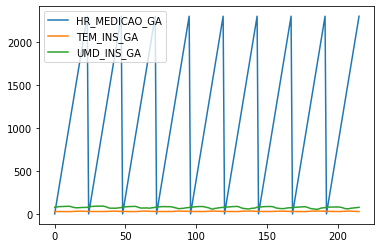

In [51]:
garoa.plot()

<AxesSubplot:xlabel='DT_MEDICAO_GA'>

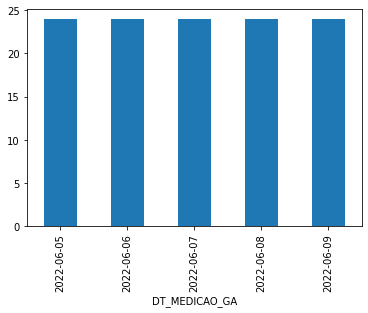

In [52]:
garoa.groupby(['DT_MEDICAO_GA']).HR_MEDICAO_GA.count().sort_values()[-5:].plot(kind='bar')

In [53]:
erro_tem = mean_absolute_percentage_error(garoa['TEM_INS_GA'], dados_inmet['TEM_INS'])
erro_umin = mean_absolute_percentage_error(garoa['UMD_INS_GA'], dados_inmet['UMD_INS'])

erro_tem

0.11625302784563495

In [54]:
erro_umin


0.1678107086434476

In [64]:
#matplotlib.use('Agg')

AttributeError: 'Line2D' object has no property 'lable'

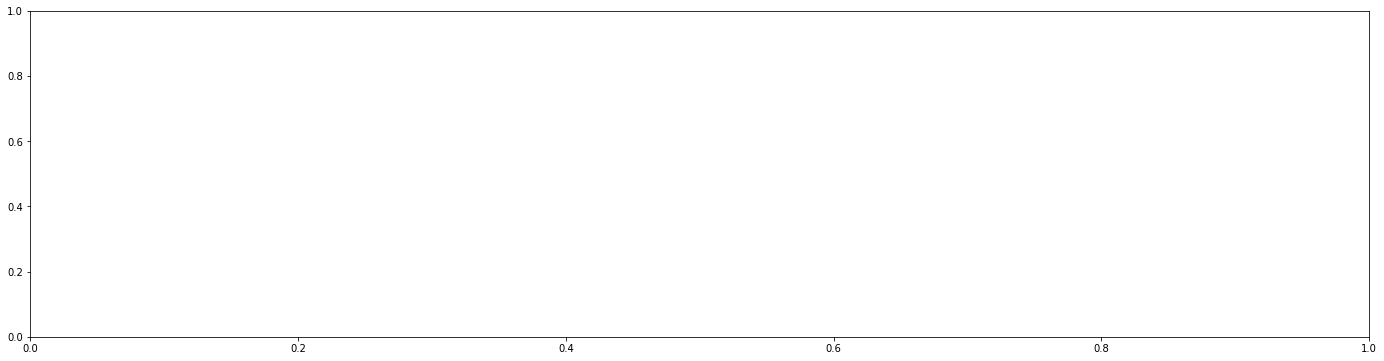

In [71]:
garoa['TEM_INS_GA'].plot(figsize =(24,6), lable="TEM_INS_GA")
dados_inmet['TEM_INS'].plot(figsize =(24,6), lable="TEM_INS")
plt.legend()